In [1]:
# import the necessary libraries we need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
from io import StringIO

from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

RSEED =  0

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import project_fun as prj

## alternative way of doing the same
#import sys;
#sys.path.insert(0,'..')
#import project_fun as prj

In [3]:
df = pd.read_csv('../data/Train_cleaned.csv',delimiter=';')

In [4]:
df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,target,hour_STA,hour_STD,...,season_num,outcome,country_arr,elevation_arr,lat_arr,lon_arr,country_dep,elevation_dep,lat_dep,lon_dep
0,2016-01-03 00:00:00,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,12,10,...,3,1,TN,22,36.851002,10.22720,MA,656,33.367500,-7.58997
1,2016-01-13 00:00:00,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,TU 31BIMO,20.0,16,15,...,3,1,TN,22,36.851002,10.22720,IT,768,45.630600,8.72811
2,2016-01-16 00:00:00,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,TU 32AIMN,0.0,6,4,...,3,0,TR,325,41.275333,28.75200,TN,22,36.851002,10.22720
3,2016-01-17 00:00:00,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,TU 736IOK,0.0,17,14,...,3,0,FR,90,47.153198,-1.61073,TN,19,33.875000,10.77550
4,2016-01-17 00:00:00,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,TU 320IMU,22.0,15,14,...,3,1,DZ,82,36.691002,3.21541,TN,22,36.851002,10.22720


In [5]:
# 1) encode departure countries
le1 = LabelEncoder()
le1.fit(df['country_dep'])
df['country_dep'] = le1.transform(df['country_dep'])

# 2) encode arrival countries
le2 = LabelEncoder()
le2.fit(df['country_arr'])
df['country_arr'] = le2.transform(df['country_arr'])

# 2) encode flight id
le3 = LabelEncoder()
le3.fit(df['FLTID'])
df['FLTID'] = le3.transform(df['FLTID'])

In [6]:
df.columns

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'AC', 'target',
       'hour_STA', 'hour_STD', 'month', 'year', 'day_of_week',
       'scheduled_time_duration', 'season', 'season_num', 'outcome',
       'country_arr', 'elevation_arr', 'lat_arr', 'lon_arr', 'country_dep',
       'elevation_dep', 'lat_dep', 'lon_dep'],
      dtype='object')

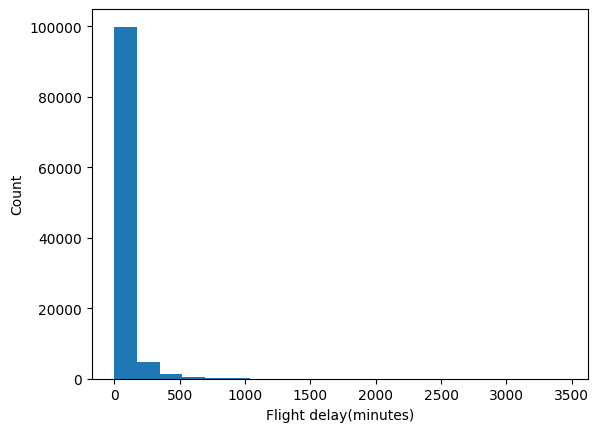

In [7]:
#sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['target'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Flight delay(minutes)', ylabel='Count');

In [8]:
df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,target,hour_STA,hour_STD,...,season_num,outcome,country_arr,elevation_arr,lat_arr,lon_arr,country_dep,elevation_dep,lat_dep,lon_dep
0,2016-01-03 00:00:00,230,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,12,10,...,3,1,48,22,36.851002,10.22720,31,656,33.367500,-7.58997
1,2016-01-13 00:00:00,257,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,TU 31BIMO,20.0,16,15,...,3,1,48,22,36.851002,10.22720,26,768,45.630600,8.72811
2,2016-01-16 00:00:00,86,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,TU 32AIMN,0.0,6,4,...,3,0,49,325,41.275333,28.75200,51,22,36.851002,10.22720
3,2016-01-17 00:00:00,164,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,TU 736IOK,0.0,17,14,...,3,0,17,90,47.153198,-1.61073,51,19,33.875000,10.77550
4,2016-01-17 00:00:00,136,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,TU 320IMU,22.0,15,14,...,3,1,14,82,36.691002,3.21541,51,22,36.851002,10.22720


In [9]:
mask = df['target'] == 0
mask_target = df[~mask]['target']

In [10]:
mask_target

0         260.0
1          20.0
4          22.0
5          53.0
6          10.0
          ...  
106786      8.0
106834     20.0
106867     15.0
106931     22.0
107014     14.0
Name: target, Length: 69207, dtype: float64

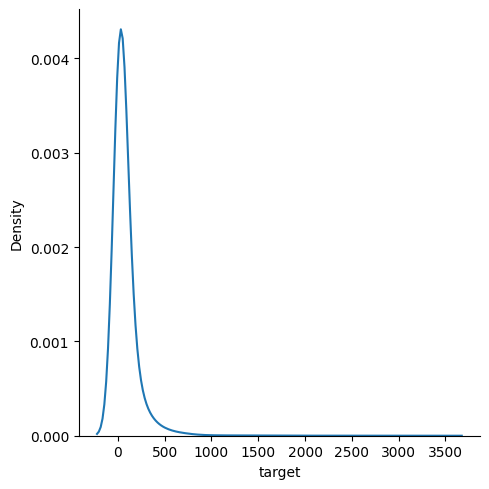

In [11]:
mask = df['target'] != 0
sns.displot(df, x=df[mask]['target'], kind="kde",bw_adjust=5);

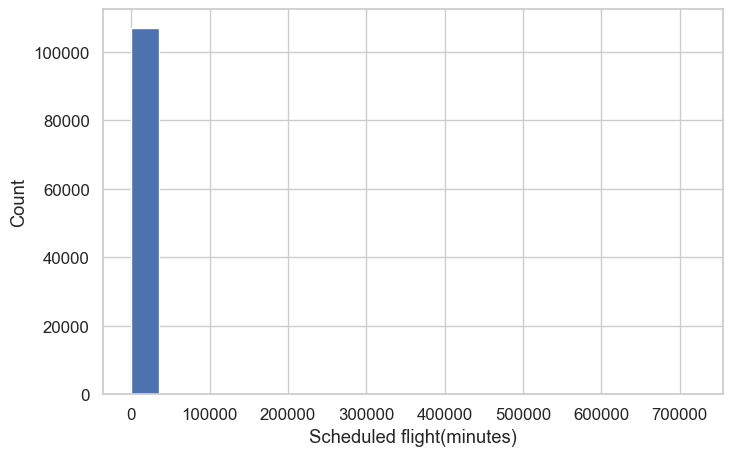

In [12]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['scheduled_time_duration'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Scheduled flight(minutes)', ylabel='Count');

In [13]:
df.drop(['DATOP','STA','STD','season','outcome','lat_arr','lon_arr','lat_dep','lon_dep'],axis=1,inplace=True)

In [14]:
df.sample(5)

,FLTID,DEPSTN,ARRSTN,AC,target,hour_STA,hour_STD,month,year,day_of_week,scheduled_time_duration,season_num,country_arr,elevation_arr,country_dep,elevation_dep
72743,91,BEG,TUN,TU 320IMR,40.0,13,11,2,2018,1,120.0,3,48,22,41,335
79389,1161,JED,TUN,TU 332IFM,6.0,4,23,6,2018,1,295.0,1,48,22,44,48
64271,266,TUN,CAI,TU 31BIMQ,26.0,17,14,12,2017,5,180.0,3,15,382,51,22
68528,1751,TUN,SFA,TU CR9ISA,0.0,7,6,7,2017,1,45.0,1,48,85,51,22
103776,1749,DJE,TUN,UG AT7AT7,0.0,20,19,1,2018,1,60.0,3,48,22,51,19


In [15]:
# Define features and target
y = df['target']
X = df[['FLTID','hour_STA','hour_STD','month','year','scheduled_time_duration','country_dep','season_num','elevation_dep','day_of_week']]

# Split the features and target data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED, train_size = .8)

## XGBoost regression

In [16]:
xgb = XGBRegressor()

#fit model
xgb.fit(X_train, y_train)

#predict model
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [17]:
print('Test_evaluation_metrics')
print("R-squared_xgb:", r2_score(y_test, y_test_pred_xgb).round(3))
print("RMSE-squared_xgb:", mean_squared_error(y_test, y_test_pred_xgb, squared=False).round(3))
print('-----------------')
print('Train_evaluation_metrics')
print("R-squared_xgb:", r2_score(y_train, y_train_pred_xgb).round(3))
print("RMSE-squared_xgb:", mean_squared_error(y_train, y_train_pred_xgb, squared=False).round(3))

Test_evaluation_metrics
R-squared_xgb: 0.111
RMSE-squared_xgb: 100.218
-----------------
Train_evaluation_metrics
R-squared_xgb: 0.312
RMSE-squared_xgb: 98.742


In [18]:
y_test

3529        0.0
82449       0.0
81823      31.0
57938      10.0
16375       0.0
          ...  
65167     655.0
105232      0.0
77269       0.0
31791       0.0
60915     108.0
Name: target, Length: 21435, dtype: float64

In [19]:
df = pd.DataFrame('y_test')
sns.kdeplot(df, 'x')

ValueError: DataFrame constructor not properly called!

## XGBoost with scaling

### standard scaler

In [20]:
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()

In [21]:
scaler = StandardScaler()
numerical = ['FLTID', 'year','scheduled_time_duration','elevation_dep']
X_train_sc[numerical] = scaler.fit_transform(X_train_sc[numerical])
X_test_sc[numerical] = scaler.transform(X_test_sc[numerical])

#pd.DataFrame(X_train_sc[numerical])

In [ ]:
X_train_sc

In [ ]:
xgb_sc = XGBRegressor()

#fit model
xgb_sc.fit(X_train, y_train)

#predict model
y_train_pred_xgb_sc = xgb_sc.predict(X_train)
y_test_pred_xgb_sc = xgb_sc.predict(X_test)

In [ ]:
print('Test_evaluation_metrics_standardscaler')
print("R-squared_xgb_sc:", r2_score(y_test, y_test_pred_xgb_sc).round(3))
print("RMSE-squared_xgb_sc:", mean_squared_error(y_test, y_test_pred_xgb_sc, squared=False).round(3))
print('-----------------')
print('Train_evaluation_metrics')
print("R-squared_xgb_sc:", r2_score(y_train, y_train_pred_xgb_sc).round(3))
print("RMSE-squared_xgb_sc:", mean_squared_error(y_train, y_train_pred_xgb_sc, squared=False).round(3))

## minmax_scaler

In [ ]:
X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

In [ ]:
scaler_mm = MinMaxScaler()
numerical = ['FLTID', 'year','scheduled_time_duration','elevation_dep']
X_train_mm[numerical] = scaler_mm.fit_transform(X_train_mm[numerical])
X_test_mm[numerical] = scaler_mm.transform(X_test_mm[numerical])

#pd.DataFrame(X_train_sc[numerical])

In [ ]:
xgb_mm = XGBRegressor()

#fit model
xgb_mm.fit(X_train, y_train)

#predict model
y_train_pred_xgb_mm = xgb_sc.predict(X_train)
y_test_pred_xgb_mm = xgb_sc.predict(X_test)

In [ ]:
print('Test_evaluation_metrics_MinMaxscaler')
print("R-squared_xgb_sc:", r2_score(y_test, y_test_pred_xgb_mm).round(3))
print("RMSE-squared_xgb_sc:", mean_squared_error(y_test, y_test_pred_xgb_mm, squared=False).round(3))
print('-----------------')
print('Train_evaluation_metrics')
print("R-squared_xgb_sc:", r2_score(y_train, y_train_pred_xgb_mm).round(3))
print("RMSE-squared_xgb_sc:", mean_squared_error(y_train, y_train_pred_xgb_mm, squared=False).round(3))

In [22]:
prj.calculate_metrics(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)

Metrics on training data
RMSE: 98.742
R2: 0.312
------------------------------
Metrics on test data
RMSE: 100.218
R2: 0.111
------------------------------


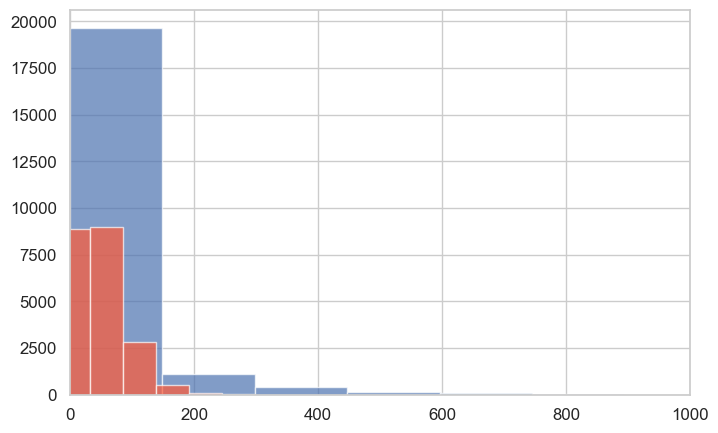

In [42]:
plt.hist(y_test, bins=20,alpha=0.7) # blue is the true value
plt.hist(y_test_pred_xgb,bins = 20, color="#FF5A36", alpha=0.7) #orange is the predicted
plt.xlim([0,1000]);

# Random Forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
rf_reg.fit(X_train,y_train)

y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

In [ ]:
prj.calculate_metrics(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
ab_reg = AdaBoostRegressor(random_state=10, n_estimators=100)
ab_reg.fit(X_train,y_train)
y_train_pred_ab = ab_reg.predict(X_train)
y_test_pred_ab = ab_reg.predict(X_test)

In [ ]:
prj.calculate_metrics(y_train, y_train_pred_ab, y_test, y_test_pred_ab)

In [ ]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score

# Initialize the classifier
clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor()) 

# Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120],                
              'learning_rate':[0.1, 0.5, 1.],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

In [ ]:
# Perform grid search on the classifier using 'scorer' as the scoring method
adaboost_gs = GridSearchCV(clf, param_grid=parameters, scoring = scorer, cv = 5, n_jobs = -1)

# Fit the grid search object to the training data and find the optimal parameters
adaboost_gs.fit(X_train,y_train)

In [ ]:
# Get the  best estimator
best_clf = adaboost_gs.best_estimator_
best_clf

In [ ]:
clf.fit(X_train,y_train)

# Make predictions using the unoptimized model
predictions = clf.predict(X_test)
predictions_train = clf.predict(X_train)


# Make predictions using the optimized model
best_predictions = best_clf.predict(X_test)
best_predictions_train = best_clf.predict(X_train)


In [ ]:
print('unoptimized model')
prj.calculate_metrics(y_train, best_predictions_train, y_test, best_predictions)

In [ ]:
print('optimized model')
prj.calculate_metrics(y_train, best_predictions_train, y_test, best_predictions)